In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt

In [2]:
# Resistivity

# Read in data 
#df = pd.read_csv("connor-data/2025-03-04/connor_2025-03-04_1SS9.csv",skiprows=20,header=0)
df0 = pd.read_csv("2025-03-04/connor_2025-03-04_2SS9.csv",skiprows=20,header=0)
df0 = pd.concat([df0,pd.read_csv("2025-03-04/connor_2025-03-04_3SS9.csv",skiprows=20,header=0)])

# Slim data by removing extra columns
df0 = df0.drop(['T_err','MM1_error','MM2_error','MM3_error','MM4_reading','MM4_error'],axis='columns')

# Name columns
df0.columns = ['t','T','V12','V34','I56']

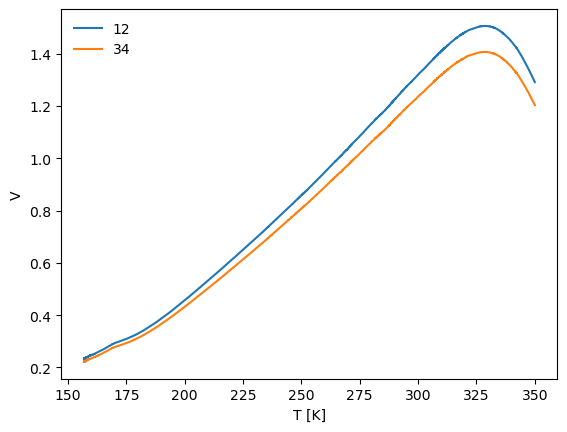

In [3]:
plt.plot(df0['T'],df0['V12'],label='12')
plt.plot(df0['T'],df0['V34'],label='34')
plt.ylabel('V')
plt.xlabel('T [K]')
plt.legend(frameon=False)

# Can do this with both signs of current and subtract them to get rid of thermo-electric voltage,
# which doesn't change sign with current

# Intrinsic region = high temperatures, resisistivity decreasing with temperature
# Extrinsic region = low temperatures, doping really matters, 
# resistivity increasing with temperature, behaves like a metal

Text(0.5, 0, 'T [K]')

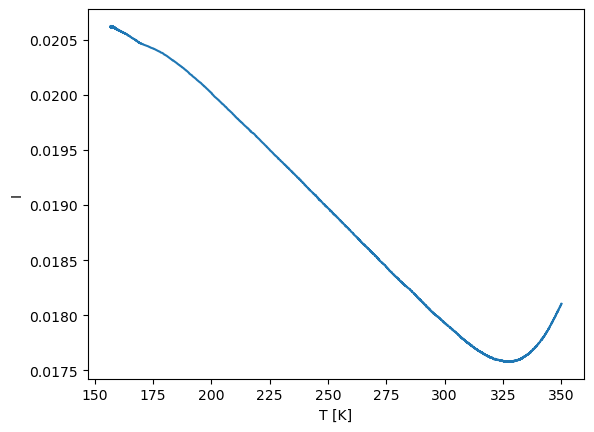

In [4]:
plt.plot(df0['T'],df0['I56'])
plt.ylabel('I')
plt.xlabel('T [K]')

Text(0.5, 0, 'T [K]')

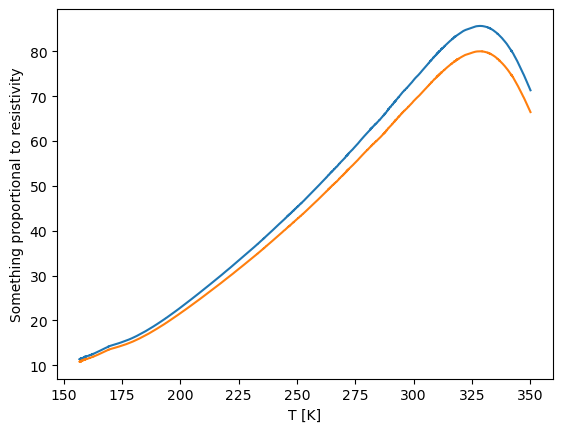

In [5]:
plt.plot(df0['T'],df0['V12']/df0['I56'])
plt.plot(df0['T'],df0['V34']/df0['I56'])
plt.ylabel('Something proportional to resistivity')
plt.xlabel('T [K]')

In [6]:
# Hall effect

# Read in data 
# B < 0, I > 0
df1 = pd.read_csv("2025-03-11/connor_2025-03-11_1SS9.csv",skiprows=20,header=0)
# B < 0, I < 0
df2 = pd.read_csv("2025-03-12/connor_2025-03-12_1SS9.csv",skiprows=20,header=0)
# B > 0, I < 0
df3 = pd.read_csv("2025-03-18/connor_2025-03-18_1SS9.csv",skiprows=20,header=0)
# B > 0, I > 0
df4 = pd.read_csv("2025-03-19/connor_2025-03-19_2SS9.csv",skiprows=20,header=0)

# Slim data by removing extra columns
df1 = df1.drop(['T_err','MM1_error','MM2_error','MM3_error','MM4_reading','MM4_error'],axis='columns')
df2 = df2.drop(['T_err','MM1_error','MM2_error','MM3_error','MM4_reading','MM4_error'],axis='columns')
df3 = df3.drop(['T_err','MM1_error','MM2_error','MM3_error','MM4_reading','MM4_error'],axis='columns')
df4 = df4.drop(['T_err','MM1_error','MM2_error','MM3_error','MM4_reading','MM4_error'],axis='columns')

# Name columns
df1.columns = ['t','T','V13','V24','I56']
df2.columns = ['t','T','V13','V24','I56']
df3.columns = ['t','T','V13','V24','I56']
df4.columns = ['t','T','V13','V24','I56']

In [7]:
# Functions for interpolating

def V13(df, T):
    a = scipy.interpolate.interp1d(df['T'],df['V13'])
    return a(T)

def V24(df, T):
    a = scipy.interpolate.interp1d(df['T'],df['V24'])
    return a(T)

def I56(df, T):
    a = scipy.interpolate.interp1d(df['T'],df['I56'])
    return a(T)

def rho12(df, T):
    a = scipy.interpolate.interp1d(df['T'],df['V12']/df['I56'])
    return a(T)

def rho34(df, T):
    a = scipy.interpolate.interp1d(df['T'],df['V34']/df['I56'])
    return a(T)

Text(0.5, 0, 'T [K]')

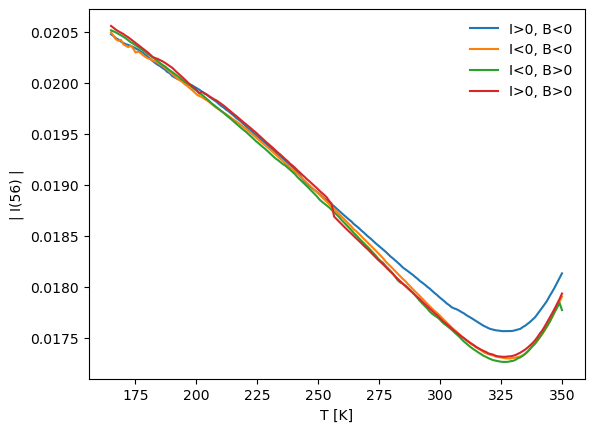

In [8]:
# Plot I_{56} from all datasets

temp = np.linspace(165,350,185)
plt.plot(temp,abs(I56(df1,temp)),label='I>0, B<0')
plt.plot(temp,abs(I56(df2,temp)),label='I<0, B<0')
plt.plot(temp,abs(I56(df3,temp)),label='I<0, B>0')
plt.plot(temp,abs(I56(df4,temp)),label='I>0, B>0')
plt.legend(frameon=False)

plt.ylabel('| I(56) |')
plt.xlabel('T [K]')

Text(0.5, 0, 'T [K]')

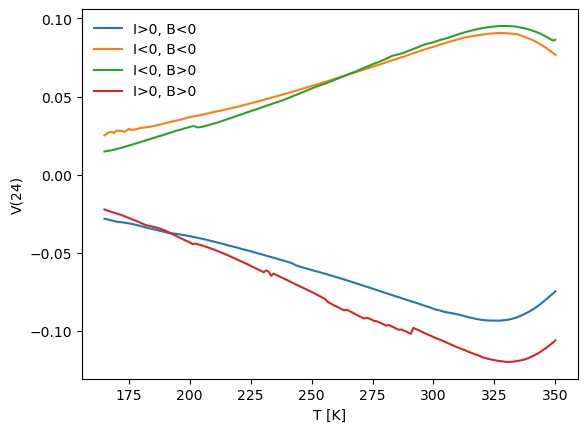

In [9]:
# Plot V_{24} from all datasets

temp = np.linspace(165,350,185)
plt.plot(temp,V24(df1,temp),label='I>0, B<0')
plt.plot(temp,V24(df2,temp),label='I<0, B<0')
plt.plot(temp,V24(df3,temp),label='I<0, B>0')
plt.plot(temp,V24(df4,temp),label='I>0, B>0')
plt.legend(frameon=False)

plt.ylabel('V(24)')
plt.xlabel('T [K]')

# Small difference between different signs of magnetic field indicates that effect of Hall voltage is small. 
# Other contributions will be of comparable size and we will get bad answers

Text(0.5, 0, 'T [K]')

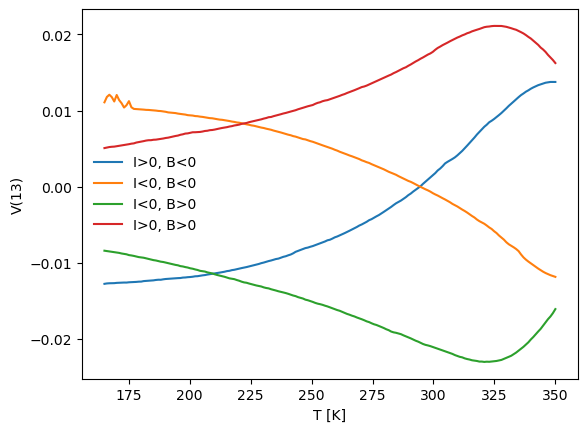

In [10]:
# Plot V_{13} from all datasets

temp = np.linspace(165,350,185)
plt.plot(temp,V13(df1,temp),label='I>0, B<0')
plt.plot(temp,V13(df2,temp),label='I<0, B<0')
plt.plot(temp,V13(df3,temp),label='I<0, B>0')
plt.plot(temp,V13(df4,temp),label='I>0, B>0')
plt.legend(frameon=False)

plt.ylabel('V(13)')
plt.xlabel('T [K]')

# Big difference between different signs of magnetic field indicates that effect of Hall voltage is big. 

Text(0.5, 0, 'T [K]')

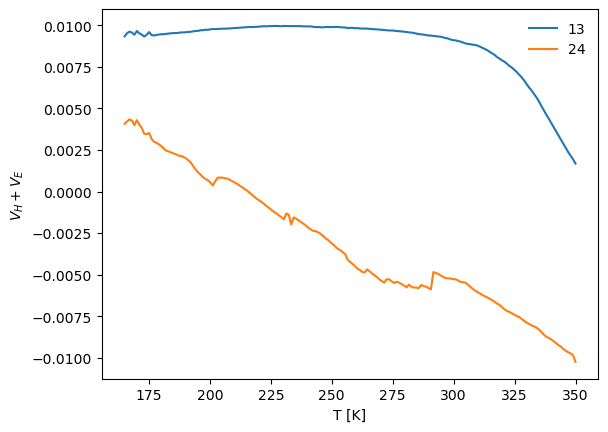

In [11]:
# Correct to V_H + V_E from Linberg's Eq 17

temp = np.linspace(165,350,185)
E1 = V13(df4,temp)
E2 = V13(df3,temp)
E3 = V13(df2,temp)
E4 = V13(df1,temp)

V13_corr = (E1 - E2 + E3 - E4)/4.0

F1 = V24(df4,temp)
F2 = V24(df3,temp)
F3 = V24(df2,temp)
F4 = V24(df1,temp)

V24_corr = (F1 - F2 + F3 - F4)/4.0

plt.plot(temp,V13_corr,label='13')
plt.plot(temp,V24_corr,label='24')
plt.legend(frameon=False)

plt.ylabel('$V_H + V_E$')
plt.xlabel('T [K]')

# In extrinsic region, Hall voltage should be nearly flat (like a metal)

Text(0.5, 0, 'T [K]')

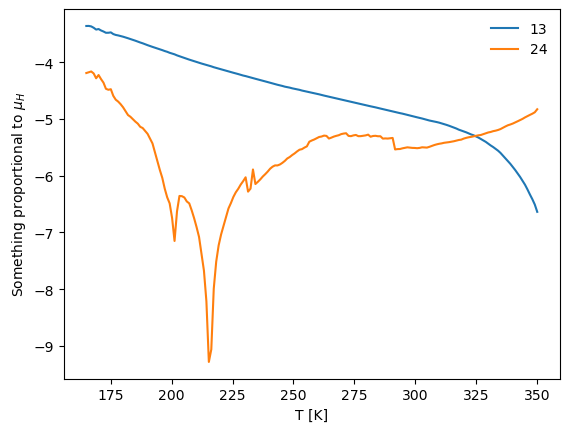

In [13]:
# Hall mobility ~ V/IR

muH_13 = np.log(abs(V13_corr/abs(I56(df4,temp))/rho12(df0,temp)))
muH_24 = np.log(abs(V24_corr/abs(I56(df4,temp))/rho12(df0,temp)))

plt.plot(temp,muH_13,label='13')
plt.plot(temp,muH_24,label='24')
plt.legend(frameon=False)
plt.ylabel(r'Something proportional to $\mu_H$')
plt.xlabel('T [K]')

# Turnover around 215 is FAKE - it is in the extrinsic region
# Turnover that we haven't quite reached - above 350 K - is the real one

Text(0.5, 0, 'T [K]')

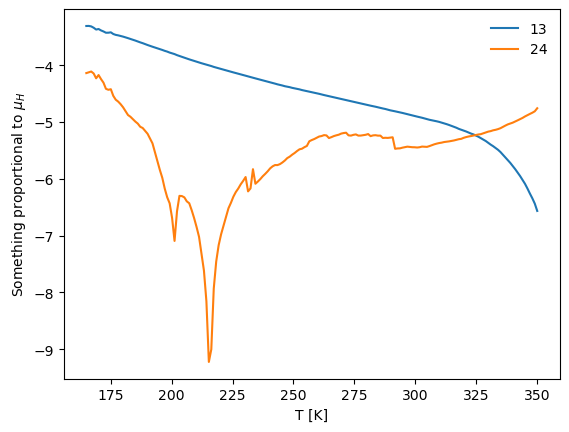

In [14]:
# Hall mobility ~ V/IR with resistivity measurement from the other leads is similar

muH_13 = np.log(abs(V13_corr/abs(I56(df4,temp))/rho34(df0,temp)))
muH_24 = np.log(abs(V24_corr/abs(I56(df4,temp))/rho34(df0,temp)))

plt.plot(temp,muH_13,label='13')
plt.plot(temp,muH_24,label='24')
plt.legend(frameon=False)
plt.ylabel(r'Something proportional to $\mu_H$')
plt.xlabel('T [K]')